<a href="https://colab.research.google.com/github/afcarioca/rs_linear/blob/main/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### REGRESSÃO LINEAR SIMPLES ####

In [572]:
# Importação de Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy import stats
import statsmodels.api as sm
import pylab as py
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

### Análise Exploratória dos Dados

In [573]:
# Leitura e conversão do arquivo
df = pd.read_csv('./dadosRLS.txt', sep=" ")
df.head()

,renda,felicidade
1,3.862647,2.314489
2,4.979381,3.433490
3,4.923957,4.599373
4,3.214372,2.791114
5,7.196409,5.596398


In [574]:
### Análise os dados ####
df.describe()

,renda,felicidade
count,498.000000,498.000000
mean,4.466902,3.392859
std,1.737527,1.432813
min,1.506275,0.266044
25%,3.006256,2.265864
50%,4.423710,3.472536
75%,5.991913,4.502621
max,7.481521,6.863388


In [575]:
### Dados Nulos ###
df.isnull().sum()


,0
renda,0
felicidade,0


In [576]:
### Dados Vazios ###
print(f'Felicidade: {(df["felicidade"] == "").sum()}')
print(f'Renda: {(df["renda"] == "").sum()}')


Felicidade: 0
Renda: 0


In [577]:
### Histograma ####
def print_hist(df):
  cols = list(df.columns)
  for col in cols:
    plt.title(f"Histograma {col}")
    plt.xlabel(f"{col}")
    plt.ylabel("Frequência")
    sns.histplot(df[f"{col}"], stat="density", linewidth=1)

    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, df[f"{col}"].mean(), df[f"{col}"].std())
    plt.plot(x, p, 'k', linewidth=2)

    title = "Normal"
    plt.title(title)

    plt.show()

In [578]:
### Box Plot ####
def print_box(df):
  cols = list(df.columns)
  for col in cols:
    plt.title(f"Box Plot {col}")
    sns.boxplot(y=df[f"{col}"])
    plt.show()

## Os gráficos apresentrados mostram que as densidades dos dados da variável "felicidade" podem ser visualizadas através de uma Distribuição Normal. Logo, "fecilidade" pode ser vista como uma variável resposta dentro do modelo de Regressão Linear Simples.   

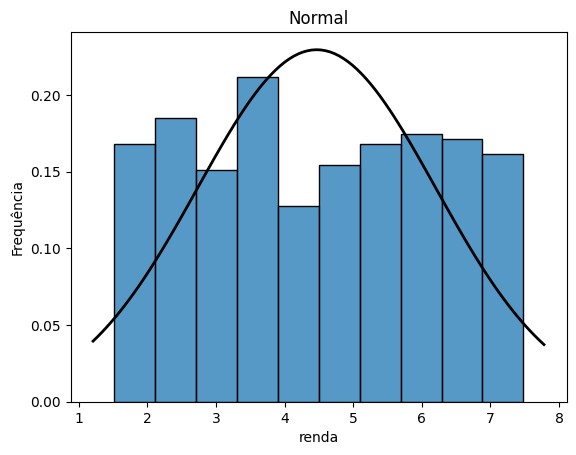

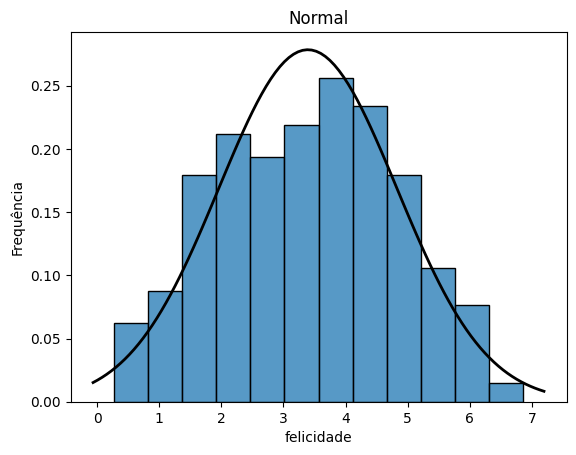

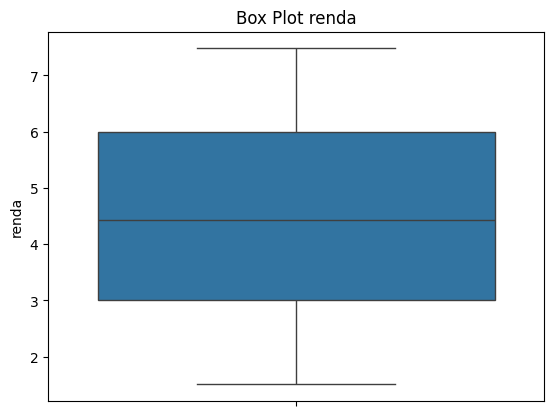

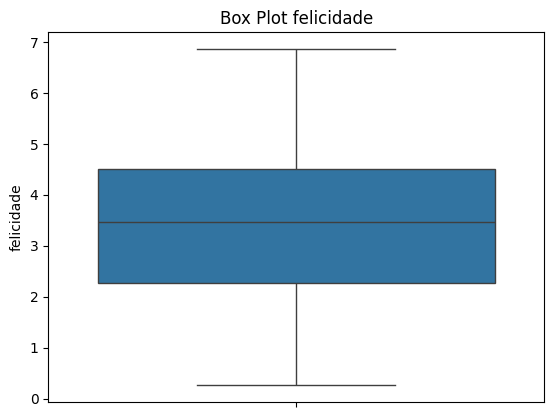

In [579]:
print_hist(df)
print_box(df)

## Apesar do Teste de Shapiro Wilk apresentar p_values inferiores a 0.05, não significa que devemos desconsiderar a hipótese de que os dados da variável "felicidade" se comportam como uma Distribuição Normal.

In [580]:
### Teste de Shapiro Wilk ###
def print_shapiro(df):
  cols = list(df.columns)
  df_new = pd.DataFrame(columns=["VAR", "STATISTIC", "P_VALUE"])
  for col in cols:
    res = stats.shapiro(df[f"{col}"])
    df_new.loc[len(df_new.index)] = [col, res[0], res[1]]

  print(df_new)



In [581]:
print_shapiro(df)

          VAR  STATISTIC       P_VALUE
0       renda   0.951850  1.158988e-11
1  felicidade   0.987052  2.095229e-04


## O Gráfico QQPLOT mostra que os dados da variável "felicidade" possuem a tendência de crescimento linear, com exceção das suas extremidades.

In [582]:
### Gráfico QQPLOT ###
def print_qqplot(df):
  cols = list(df.columns)
  for col in cols:
    sm.qqplot(df[f"{col}"],fit=True, line="45")


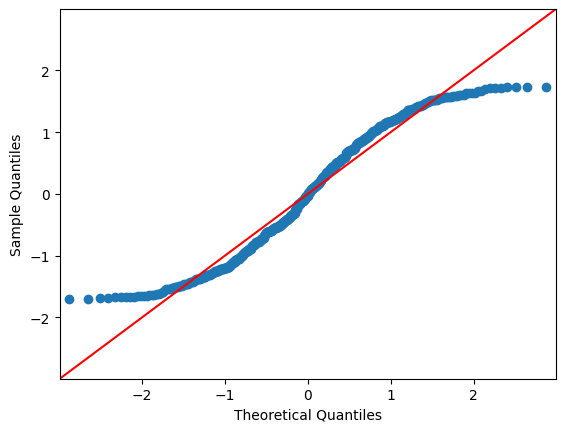

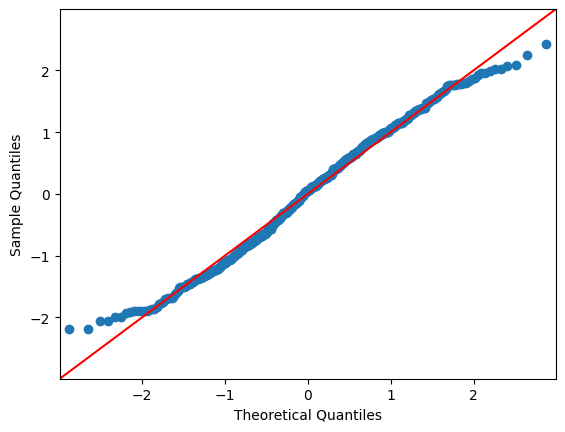

In [583]:
print_qqplot(df)

## O resultado abaixo indica que as variáveis "felicidade" e "renda" possuem forte correlação. Superior a 85%.

In [584]:
### Coeficiente de Pearson ####
res = stats.pearsonr(df["renda"], df["felicidade"])
print(f"Coeficiente de Pearson: {res[0]}")

Coeficiente de Pearson: 0.8656337299838432


## O gráfico abaixo indica que as variáveis "felicidade" e "renda" possuem uma forte relação de linearidade

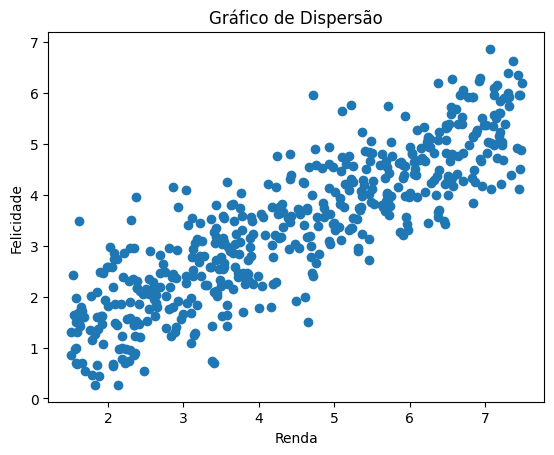

In [585]:
# Gráfico de dispersão
plt.scatter(df["renda"], df["felicidade"])
plt.title("Gráfico de Dispersão")
plt.xlabel("Renda")
plt.ylabel("Felicidade")
plt.show()

###  Treinamento do Modelo

In [586]:
X = df["renda"]
y = df["felicidade"]

#Aplicando a técnica de Holdout para separar os dados de teste e treinamento.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=True, random_state=123)

print(f"{round(X_train.shape[0]/df.shape[0], 2)*100}% para treino")
print(f"{round(X_test.shape[0]/df.shape[0], 2)*100}% para teste")


80.0% para treino
20.0% para teste


In [587]:
#Modelo

#Adicionando o Intecept aos dados de treinamento e teste
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

#Instanciando o modelo de Regressão Linear Simples
model = sm.OLS(y_train, X_train)
results = model.fit()
y_pred = results.predict(X_test)




### Os resultados apresentados na tabela indicam que:

*   O coefiente angular da reta possui o valor de 0.7146, o que indica uma função crescimento;
*   O coeficiente linear 0.1912;
*   O desvio padrão dos dados em 0.021, valor baixo;
*   P_value inferior a 0.01, o que faz com que rejeitemos a hipótese nula;




In [589]:
print(results.summary(alpha = 0.05))


                            OLS Regression Results                            
Dep. Variable:             felicidade   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     1131.
Date:                Thu, 26 Sep 2024   Prob (F-statistic):          4.11e-118
Time:                        00:26:41   Log-Likelihood:                -436.39
No. Observations:                 398   AIC:                             876.8
Df Residuals:                     396   BIC:                             884.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1912      0.101      1.900      0.0

### Os resultados abaixo indicam um forte indício de que a distribuição dos dados possui o comportamento uniforme ao apresentar:
*   valores Mínimos e Máximos próximos em valores absolutos;
*   valores do Primeiro e Tericeiro quartil próximos em valores absolutos;
*   mediana próxima de zero.


In [588]:
### Análise dos Residuos ###
res = y_test - y_pred
q = np.quantile(res, [0.25, 0.5, 0.75])

max_pred = np.max(res)
min_pred = np.min(res)

print("Mínimo:", min_pred)
print("1º Quartil:", q[0])
print("Median:", q[1])
print("3º Quartil:", q[2])
print("Máximo:", max_pred)


Mínimo: -1.9344128240388523
1º Quartil: -0.4424200648799258
Median: 0.07706722201704652
3º Quartil: 0.48277825638547267
Máximo: 2.1382442656229275


### Verificando a qualidade do ajuste

In [590]:
#Valor de Pearson Ajustado
results.rsquared_adj

0.7400042562990237

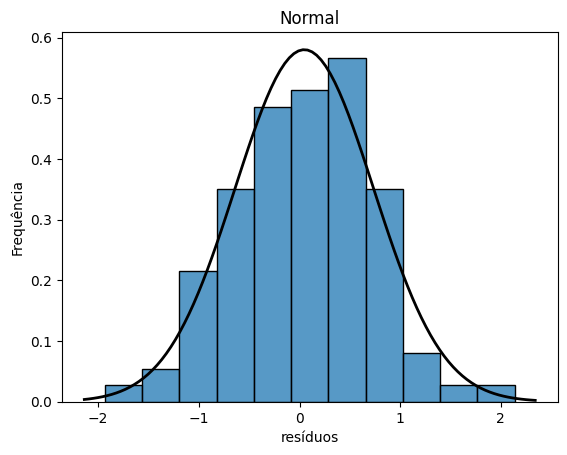

In [591]:
### Distribuição Normal ####
r = res.to_frame()
r.rename(columns={0: "resíduos"}, inplace=True)
print_hist(r)


Text(0, 0.5, 'Resíduos')

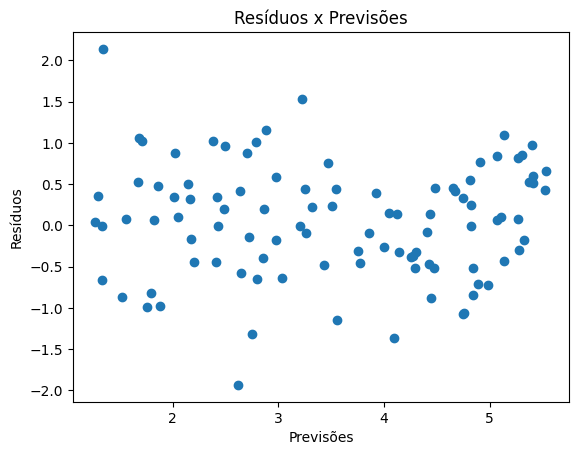

In [592]:
#Linearidade dos dados
plt.scatter(y_pred, res)
plt.title("Resíduos x Previsões")
plt.xlabel("Previsões")
plt.ylabel("Resíduos")


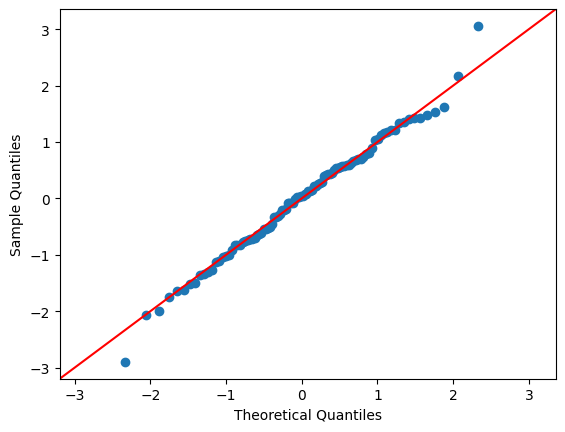

In [593]:
### QQPLOT ###
sm.qqplot(res,fit=True, line="45")
plt.show()

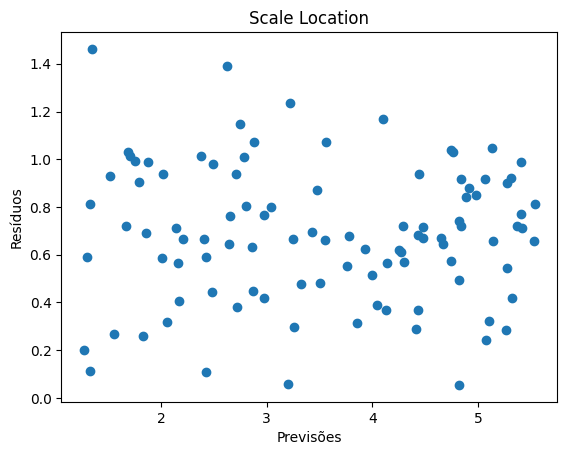

In [594]:
### Scale Location ####
plt.scatter(y_pred, np.sqrt(np.abs(res)))
plt.title("Scale Location")
plt.xlabel("Previsões")
plt.ylabel("Resíduos")
plt.show()


In [595]:
### Distância de cook ####
influence = results.get_influence()

p_inf = {}
for i in range(len(influence.cooks_distance[0])):
  if abs(influence.cooks_distance[0][i]) > 3:
     p_inf[i] = influence.cooks_distance[0][i]

if len(p_inf) == 0 :
  print("Não há pontos fora do padrão")
else:
  print(f"Foram encontrados {len(p_inf)} pontos fora do padrão")


Não há pontos fora do padrão


### Predição

In [596]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'Mean Squared Error: {mse:.2f}')
print(f'Mean Absolute Percentage Error: {mape:.2f}')

Mean Absolute Error: 0.55
Root Mean Squared Error: 0.69
Mean Squared Error: 0.47
Mean Absolute Percentage Error: 0.23
